In [3]:
#import packages and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Codes=pd.read_csv("ATUS_Survey/codes.csv")
Activities=pd.read_csv("ATUS_Survey/atusact.csv")
Summary=pd.read_csv("ATUS_Survey/atussum.csv")
Respondent=pd.read_csv("ATUS_Survey/atusresp.csv")
#print(SU.head(10))
N_people=len(Summary["tucaseid"])  #Initialize all dataframes and store number of people as variable
Roster=pd.read_csv("ATUS_Survey/atusrost.csv")

#Tabulate how much sleep each ID got (Slow)

import math
SleepDict={} 
for ind, row in Activities.iterrows():
    if (row["trcodep"]==10101) | (row["trcodep"]==10199):
        if row["tucaseid"] in SleepDict.keys():
            SleepDict[row["tucaseid"]]+=row["tuactdur24"]
        else:
            SleepDict[row["tucaseid"]]=row["tuactdur24"]
            
#Combine day of week and stat weight from Respondent file with Sleep amount from above

cols=["DayOfWeek","Sleep","Weight"]

SleepList=[]
SleepInd=0
#SleepData.loc[1]=[5,2]

for ind, row in Respondent.iterrows():
    if (row["tulineno"]==1 and math.isnan(row["tudiaryday"]) != True) and row["tucaseid"] in SleepDict.keys():
        SleepList.append([row["tudiaryday"],SleepDict[row["tucaseid"]],row["tufnwgtp"]])
        #SleepData.loc[SleepInd]=[row["teage"],SleepDict[row["tucaseid"]]]
        #SleepInd+=1
SleepData=pd.DataFrame(SleepList,columns=cols)
SleepData["WeightXSleep"]=SleepData["Weight"]*SleepData["Sleep"]
print(SleepData.head())

   DayOfWeek  Sleep     Weight  WeightXSleep
0          6    870  8155463.0  7.095253e+09
1          7    620  1735323.0  1.075900e+09
2          7    560  3830528.0  2.145096e+09
3          5    720  6622023.0  4.767857e+09
4          5    385  3068387.0  1.181329e+09


In [2]:
def Hour_Decimal(time):
    L=time.split(":")
    return int(L[0])+int(L[1])/60 +int(L[2])/3600


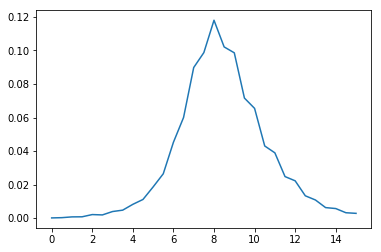

In [16]:
import numpy as np

Window=.5
Ma=16
Mi=0
Edges=np.arange(np.ceil(Ma/Window))*Window+Mi
Sums=np.zeros((len(Edges)-1,1))
for ind,i in enumerate(Edges[0:len(Edges)-1]):
    for ind2,age in enumerate(SleepData["Sleep"]/60):
        if (age>=i) & (age<i+Window):
            Sums[ind]+=SleepData["Weight"][ind2]
            
Avgs=Sums  
plt.plot(Edges[0:len(Edges)-1],Sums/np.sum(Sums))

8.67028274808
2.11342017019


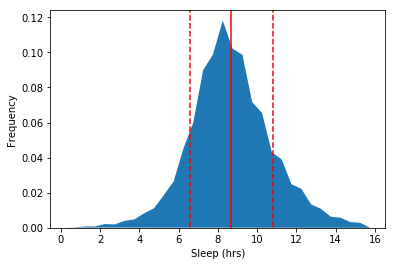

In [80]:
import matplotlib.lines as lt


fig, ax = plt.subplots()
X=Edges[0:len(Edges)]+.25
Y=Sums/np.sum(Sums)
Y=np.append(Y,0)
A=ax.fill(X,Y)
plt.xlabel('Sleep (hrs)')
plt.ylabel('Frequency')

Ea=np.transpose(np.array(Edges[0:len(Edges)-1])+.25)
Mea=np.sum(Ea*np.transpose(Sums))/np.sum(Sums)
SD=np.sqrt(np.sum(np.transpose(Sums)*np.square(Ea-Mea))/((len(Sums)-1)*np.sum(Sums)/len(Sums)))
#print(Ea*np.transpose(Sums))
print(Mea)
print(SD)
YL=plt.ylim()

plt.plot([Mea, Mea],[-10,10],'r')
plt.plot([Mea+SD, Mea+SD],[-10,10],'r--')
plt.plot([Mea-SD, Mea-SD],[-10,10],'r--')
plt.ylim([0,YL[1]])

#Mean=8.67, SD=2.11

plt.savefig("SleepHistogram.png")

IndexError: index 31 is out of bounds for axis 0 with size 31

array([  6.25000000e-02,   5.62500000e-01,   1.56250000e+00,
         3.06250000e+00,   5.06250000e+00,   7.56250000e+00,
         1.05625000e+01,   1.40625000e+01,   1.80625000e+01,
         2.25625000e+01,   2.75625000e+01,   3.30625000e+01,
         3.90625000e+01,   4.55625000e+01,   5.25625000e+01,
         6.00625000e+01,   6.80625000e+01,   7.65625000e+01,
         8.55625000e+01,   9.50625000e+01,   1.05062500e+02,
         1.15562500e+02,   1.26562500e+02,   1.38062500e+02,
         1.50062500e+02,   1.62562500e+02,   1.75562500e+02,
         1.89062500e+02,   2.03062500e+02,   2.17562500e+02,
         2.32562500e+02])

In [11]:
SleepData["Sleep"].head()

0    870
1    620
2    560
3    720
4    385
Name: Sleep, dtype: int64

In [7]:
SleepData["Sleep"]

0          870
1          620
2          560
3          720
4          385
5          675
6          531
7          445
8          645
9          180
10         515
11         575
12         576
13         840
14         570
15         630
16         570
17         530
18         570
19         575
20         580
21         480
22         512
23         505
24         495
25         803
26         510
27         705
28         560
29         545
          ... 
170587     479
170588     245
170589     517
170590     450
170591     560
170592     550
170593     489
170594     240
170595     250
170596     740
170597     615
170598     410
170599     690
170600    1088
170601     565
170602     600
170603     450
170604     540
170605     450
170606     540
170607     525
170608     620
170609     570
170610     230
170611     435
170612     570
170613     595
170614     535
170615     450
170616     360
Name: Sleep, Length: 170617, dtype: int64